In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [95]:
df = pd.read_csv('drinks.csv')

# 1. Find a dataset you'd like to explore. This can be something you're familiar with or something new.

[FiveThirtyEight has a data set of alcohol consumption by country](https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption).
    
* Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

In [96]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


## Choose one variable and plot that variable four different ways. 

Here are four different ways to look at total litres of pure alcohol consumed by each country.

__The box plot__ lets us immediately understand how the data set is distributed around the mean, but lacks individual data points.

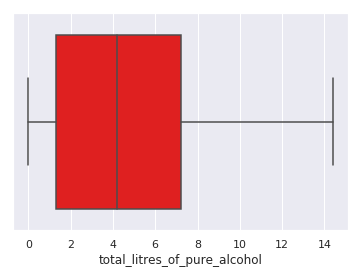

In [97]:
sns.boxplot(x='total_litres_of_pure_alcohol',
            data=df,
            color='red'
           )

__The swarm plot__ lacks that immediate understanding of the mean, but it plots individual data points. For example, we can see there are a number of countries that completely abstain from drinking in the swarm plot.

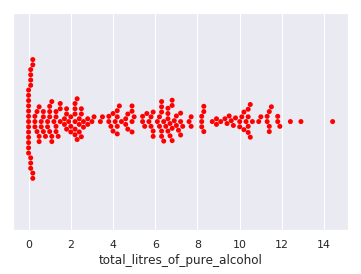

In [98]:
sns.swarmplot(x='total_litres_of_pure_alcohol',
              data=df,
              color='red',
           )

Just for fun, I generated these two plots again, but only for countries that consume some amount of alcohol.


The box plot's mean slides to the right a little bit. There are just fewer data points on the swarm plot.

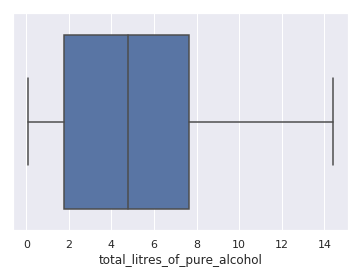

In [99]:
sns.boxplot(x='total_litres_of_pure_alcohol',
            data=df.loc[df['total_litres_of_pure_alcohol'] > 0],
           )

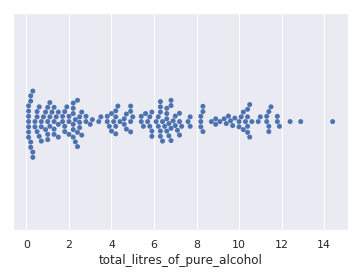

In [100]:
sns.swarmplot(x='total_litres_of_pure_alcohol',
            data=df.loc[df['total_litres_of_pure_alcohol'] > 0],
           )

__A count plot__ shows us how many times a particular value appears in the data set. The values for total litres consumed are numeric, but this plot treats the values as categorical.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]), <a list of 90 Text xticklabel objects>)

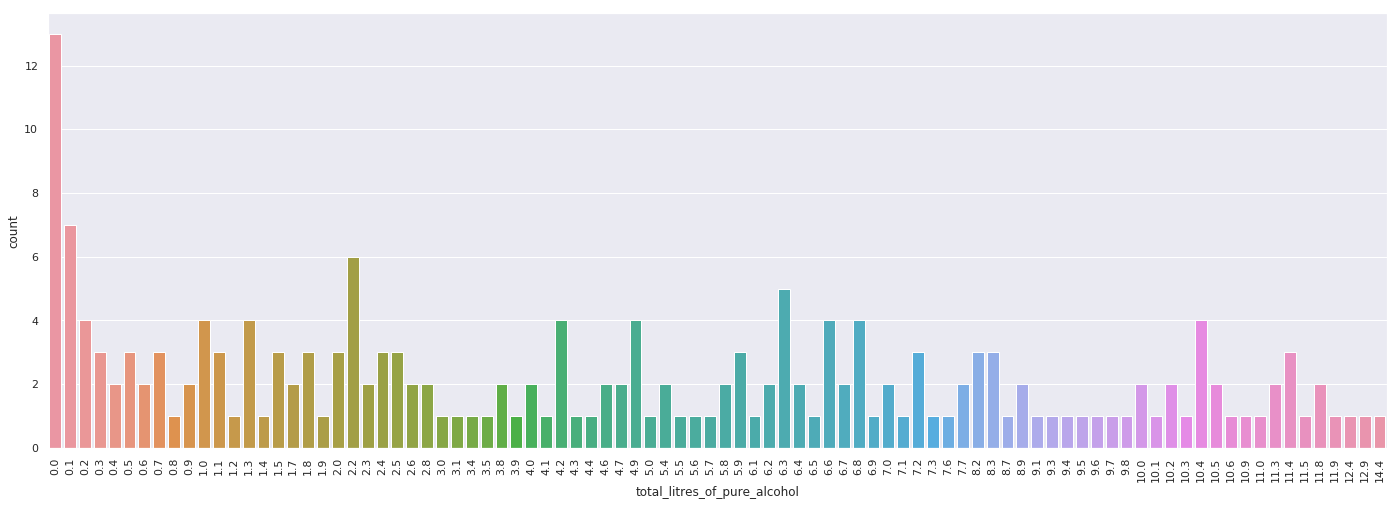

In [101]:
sns.set(style='darkgrid')
fig = plt.subplots(figsize=(24,8))
sns.countplot(x='total_litres_of_pure_alcohol',
              data=df,
             )
plt.xticks(rotation=90)

An actual distribution curve is also available, __using distplot__:

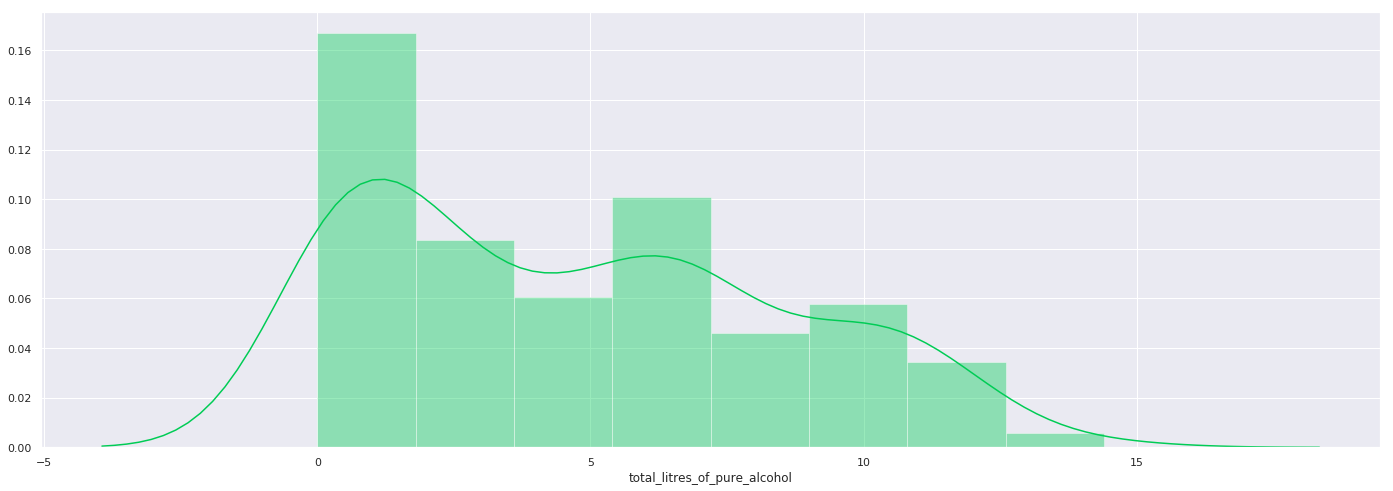

In [102]:
fig = plt.subplots(figsize=(24,8))
sns.distplot(df['total_litres_of_pure_alcohol'],
             color='#00CC55',
            )

## Choose two continuous variables, and plot them three different ways.

Beer vs. wine! :)

We can start off really basic, with a __scatter plot__. This kind of plot shows all of the observations. (There's a noticeable number of countries who drink moderate amounts of beer but do not also drink wine.)

A scatter plot can be used to get a quick overview of potential relationships between two variables.

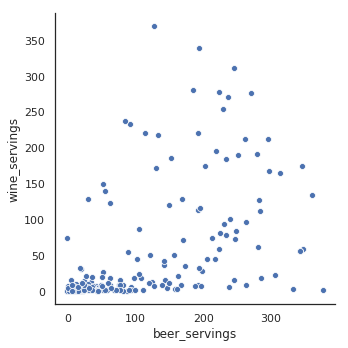

In [103]:
sns.set(style='white')
sns.relplot(x='beer_servings',
            y='wine_servings',
            data=df,
           )

__regplot__ gives us mostly the same result as a scatter plot, but with a linear regression line included, to help further analyze the relationship between the two variables. There doesn't appear to be much of a relationship between these two variables

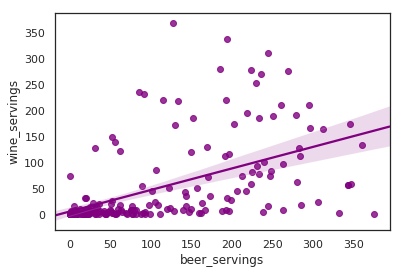

In [104]:
sns.regplot(x='beer_servings',
            y='wine_servings',
            data=df,
            color='purple',
           )

A __joint plot__ is a scatter plot with histograms for each individual variable displayed on the outer spines.

For fun, I played a bit with the 'kind' parameter--individual data points are lost when kind='hex', but it's a nice way to capture the overall distribution. Unfortunately it's not super interesting here, since most of the points are clustered along the first third or so of the x-axis.

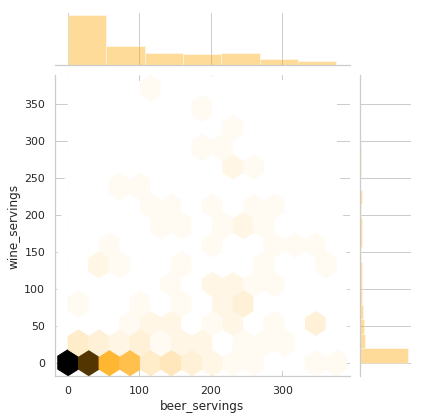

In [105]:
sns.set(style='whitegrid')
sns.jointplot(x='beer_servings',
              y='wine_servings',
              data=df,
              color='orange',
              kind='hex',
           )

## Choose one continuous variable and one categorical variable, and plot them six different ways.

Total litres of pure alcohol and country are two decent choices from this data set. This data set contains a lot of countries, so I'm going to select a handful for each example.

Here's a __bar plot__ of alcohol consumption for countries that end in -stan. Afghanistan and Pakistan are majority Muslim countries with bans on alcohol, and the other countries are former Soviet republics.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

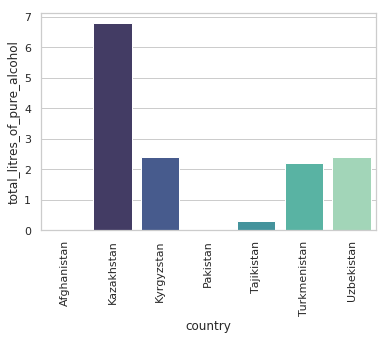

In [106]:
sns.set(style='whitegrid')
sns.barplot(x='country',
            y='total_litres_of_pure_alcohol',
            data=df.loc[df['country'].str.endswith('stan')],
            palette = 'mako',
           )
plt.xticks(rotation=90)

This __line plot__ conveys the same information, but the individual points are kind of lost.

I usually associate line plots like this with more continuous data--for example, a politician's favorability rating over time, or the realtime odds of my favorite soccer teams winning their matches. In these cases the number of observations aren't the emphasis, the change of the measured value over time can be more clearly shown. Line plots can also be easily overlaid with comparable, related observations.

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

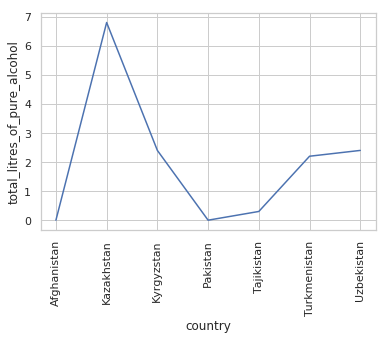

In [107]:
sns.lineplot(x='country',
            y='total_litres_of_pure_alcohol',
            data=df.loc[df['country'].str.endswith('stan')],
           )
plt.xticks(rotation=90)

This __point plot__ is nothing but the points. This isn't very exciting by itself, but if additional information needs to be conveyed, the points have additional attributes (size, color, shape) that can be used. Multiple observations can be represented here without making the graph too crowded--bars and lines take up extra space.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

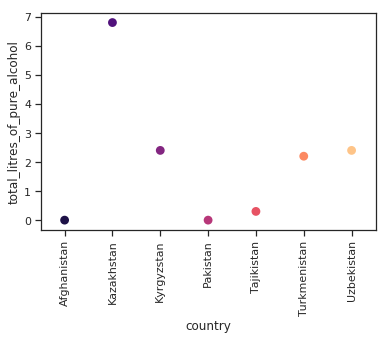

In [108]:
sns.set(style='ticks')
sns.pointplot(x='country',
            y='total_litres_of_pure_alcohol',
            data=df.loc[df['country'].str.endswith('stan')],
            palette = 'magma',
           )
plt.xticks(rotation=90)

I know I am supposed to find six ways, but I struggled with this data set to find more than these three...

# 2. Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

* Probability distributions
* Bivariate relationships
* Whether the distributions or the relationships vary across groups
* Accompany your plot with a written description of what you see.

In [109]:
dfg = pd.read_csv('google-play-store-apps/googleplaystore.csv')

In [110]:
dfg.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Categorical:
* Category, Genres (these two overlap heavily, but Genres offers more detail)
* Content Rating
* Installs
* Type (Free/Paid)

### Continuous:
* Rating (?) - I want to call this continuous even though the rating system (or at least this set of data, which I think may have been scraped from the Google Play store and not obtained via an API) rounds all ratings to the nearest tenth. 
* Reviews
* Size
* Price
    

In [111]:
# There is one bad row in this dataset, where a missing category 
#  causes all of the other columns to shift one to the left. Drop it.
dfg.drop(dfg.loc[dfg['Price'] == 'Everyone'].index, inplace=True)

# There are two apps with a Content Rating of 'Unrated'--
#  both are free, one is missing a rating, so there wasn't much to 
#  use in any kind of analysis. Let's drop them too.
dfg.drop(dfg.loc[dfg['Content Rating'] == 'Unrated'].index, inplace=True)

# Drop rows with NAs
dfg.dropna(inplace=True)

In [87]:
# All of the numeric columns in this data are being read as text
def str_to_float(value):
    try:
        return float(value)
    except:
        return 0

# I played around with converting the Installs category values to ints,
#  so they will appear in numeric order (1, 5, 10 instead of 1+, 10+, 5+)
def install_to_int(value):
    try:
        return int(re.sub(',','',value[:-1]))
    except:
        return 0

In [113]:
# Conversion of continuous values to a type we can work with.
dfg['Reviews'] = dfg['Reviews'].apply(lambda x: int(x))
dfg['Rating'] = dfg['Rating'].apply(lambda x: float(x))
dfg['Price'] = dfg['Price'].apply(lambda x: str_to_float(x[1:])) # Remove prefixed '$'
dfg['Size'] = dfg['Size'].apply(lambda x: str_to_float(x[:-1])) # Remove trailing 'M' or 'k'
dfg['Installs'] = dfg['Installs'].apply(lambda x: install_to_int(x))

Text(0.5, 1.0, 'Comparing the ratings of Free vs. Paid Google Apps, by Content Rating')

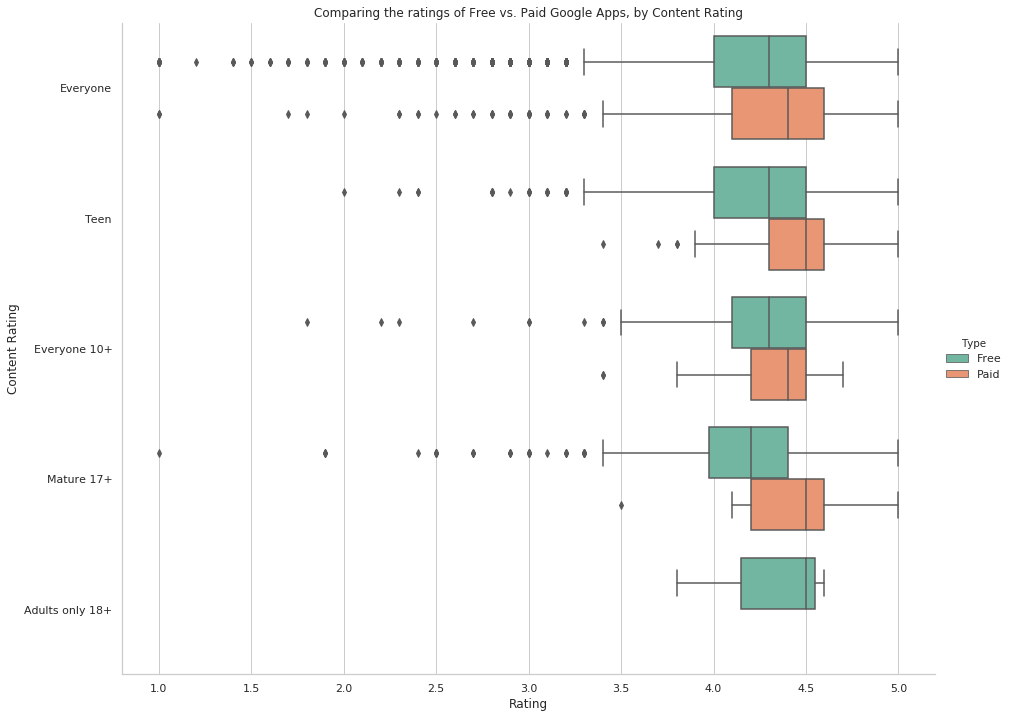

In [114]:
sns.set(style='whitegrid')

# The last permutations of other things I tried.
dfg_paid = dfg.loc[(dfg['Price'] != 0)]# & (dfg['Price'] < 200.00)] #(dfg['Price'] != 0) & ]
dfg_free = dfg.loc[(dfg['Price'] == 0)]
dfg_paid_game = dfg.loc[(dfg['Category'] == 'GAME') & (dfg['Size'] < 100)]

sns.catplot(x='Rating',
            y='Content Rating',
            kind='box',
            hue='Type',
            data=dfg,
            palette='Set2',
            height=10,
            aspect= 4/3,
           )
plt.title('Comparing the ratings of Free vs. Paid Google Apps, by Content Rating')

## Some basic analysis

(This data set seemed so promising when I grabbed it from Kaggle, but honestly in the end I feel like this may be about the best I can do...)

Most apps were rated fairly well, despite a large number of outliers in some of the Content Rating categories, with medians between 4.0 and 4.5 in all cases, and the majority of ratings above 4.0 (1st-3rd quartile in all cases except for free apps rated Mature 17+).

We can also see that Paid apps in the Google Play store were consistently rated higher than Free apps sharing the same Content Rating.

I was tempted to say "you get what you pay for", but then I looked at the same comparison using Category instead of Content Rating, and had second thoughts. For categories that have both paid and free apps, there was no consistent pattern. For some categories, paid apps ranked _lower_ than free apps--this is especially true for Dating, Finance, Social, and Parenting apps.

Text(0.5, 1.0, 'Comparing the ratings of Free vs. Paid Google Apps, by Category')

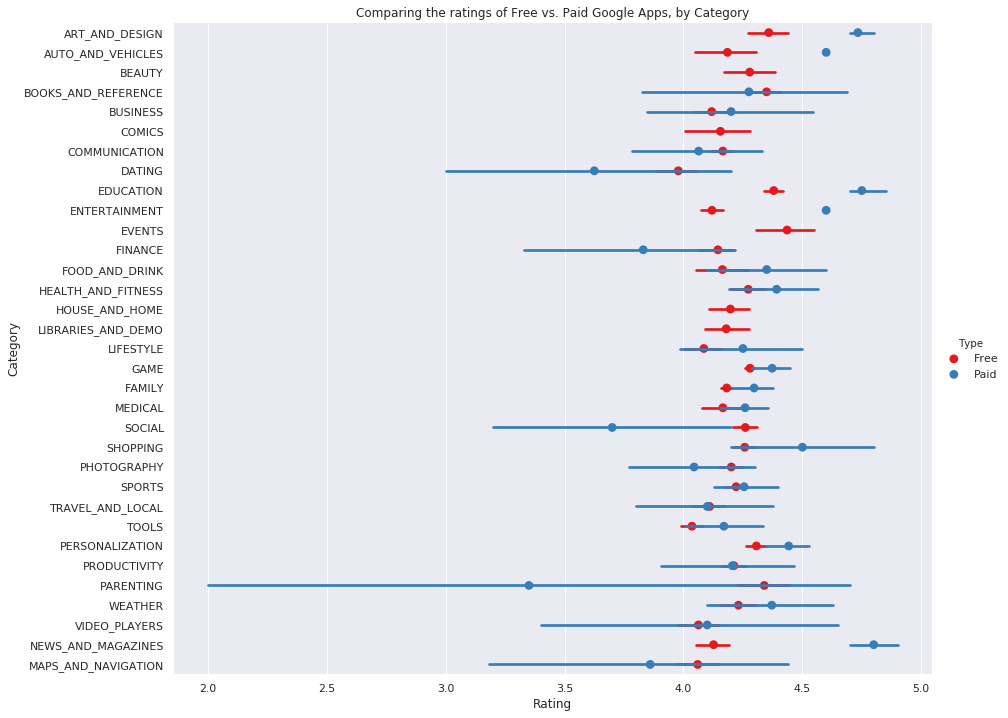

In [115]:
sns.set(style='darkgrid')

sns.catplot(x='Rating',
            y='Category',
            kind='point',
            hue='Type',
            data=dfg,
            palette='Set1',
            height=10,
            aspect= 4/3,
            join=False
           )
plt.title('Comparing the ratings of Free vs. Paid Google Apps, by Category')

Paid Parenting apps in particular, whew. What is that about?

In [116]:
dfg.loc[(dfg['Category'] == 'PARENTING') & (dfg['Type'] == 'Paid')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5973,Baby Connect (activity log),PARENTING,4.7,8343,8.3,50000,Paid,4.99,Everyone,Parenting,"July 10, 2018",6.3.16,4.0.3 and up
7658,SharedCare™ Co-parenting,PARENTING,2.0,23,0.0,100,Paid,4.59,Everyone,Parenting,"June 19, 2016",3.0.3,4.0 and up


Oh! So here is a category with just two apps, one of which was rated poorly _and_ only had a small number of installations. That almost seems unfair--maybe if we weighted ratings based on the number of installs?

I'm going to stop here...because this is already outside of the scope of the assignment. But at least I got in some kind of data cleansing.